In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plot_rides import plot_rides_by_day, plot_rides_by_hour, plot_rides_by_month, plot_rides_by_day_for_specific_month
from extract_data import extract_hour_day_month

In [2]:
data = pd.read_csv('../data/other-Dial7_B00887.csv')

In [3]:
data

,Date,Time,State,PuFrom,Address,Street
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST
...,...,...,...,...,...,...
194987,2014.09.28,21:50,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,
194988,2014.09.28,7:00,NY ...,MANHATTAN,112,W 78 ST
194989,2014.09.28,15:30,NY ...,MANHATTAN,601,W 57 ST
194990,2014.09.28,19:55,JFK DELTA TERM 2 CURBSIDE ...,NaN,,


In [6]:
data['Date/Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y.%m.%d %H:%M')
data = data.drop(['Date', 'Time'], axis = 1)

extract_hour_day_month(data)  

In [7]:
data

,State,PuFrom,Address,Street,Date/Time,Hour,Month,Day,DayOfWeek
0,NY ...,MANHATTAN,50,MURRAY ST,2014-07-06 14:30:00,14,July,6,Sunday
1,NY ...,MANHATTAN,143,AVENUE B,2014-07-04 07:15:00,7,July,4,Friday
2,NY ...,MANHATTAN,125,CHRISTOPHER ST,2014-07-05 05:45:00,5,July,5,Saturday
3,NY ...,MANHATTAN,217,E 7 ST,2014-07-06 04:30:00,4,July,6,Sunday
4,NY ...,MANHATTAN,521,W 26 ST,2014-07-05 07:45:00,7,July,5,Saturday
...,...,...,...,...,...,...,...,...,...
194987,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,,2014-09-28 21:50:00,21,September,28,Sunday
194988,NY ...,MANHATTAN,112,W 78 ST,2014-09-28 07:00:00,7,September,28,Sunday
194989,NY ...,MANHATTAN,601,W 57 ST,2014-09-28 15:30:00,15,September,28,Sunday
194990,JFK DELTA TERM 2 CURBSIDE ...,NaN,,,2014-09-28 19:55:00,19,September,28,Sunday


In [8]:
data['DayOfWeek'].unique()

array(['Sunday', 'Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday',
       'Monday'], dtype=object)

In [9]:
data['Month'].unique()

array(['July', 'August', 'September'], dtype=object)

In [10]:
month_order = ['July', 'August', 'September']

Month
July         67076
August       63610
September    64306
Name: count, dtype: int64


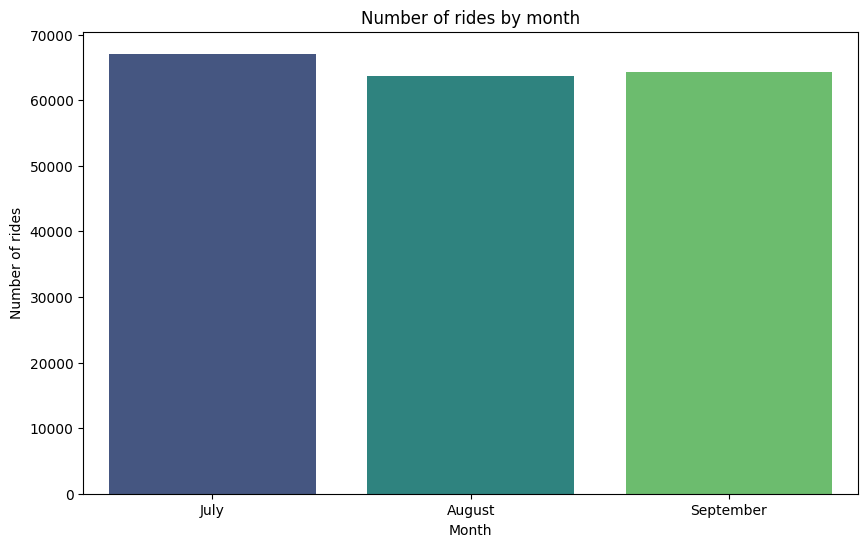

In [11]:
plot_rides_by_month(data, month_order)

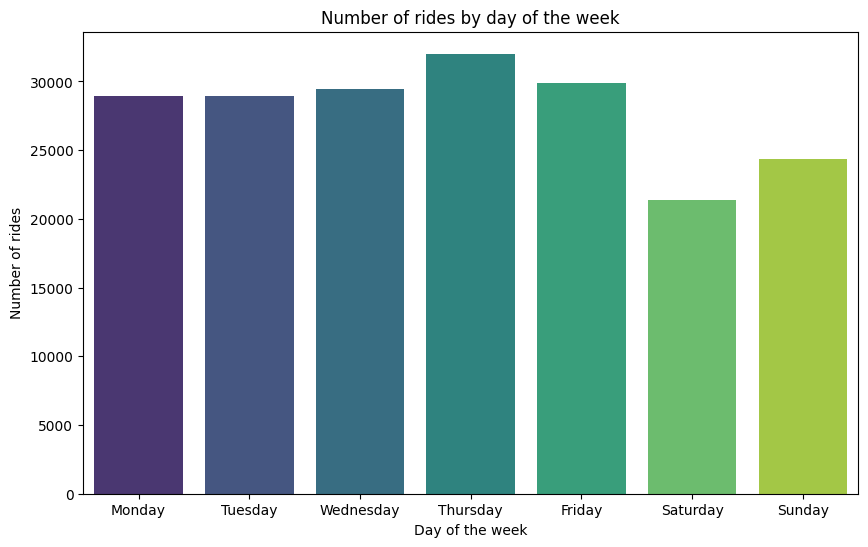

In [12]:
plot_rides_by_day(data)

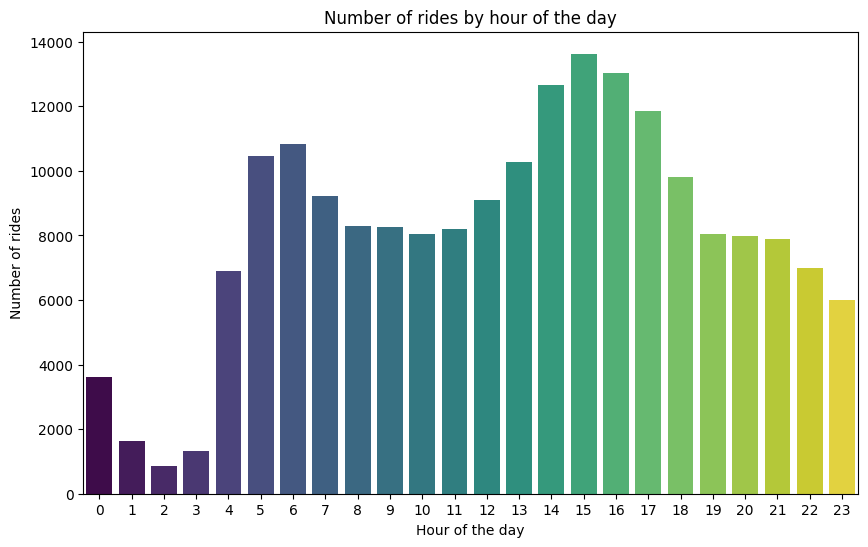

In [13]:
plot_rides_by_hour(data)

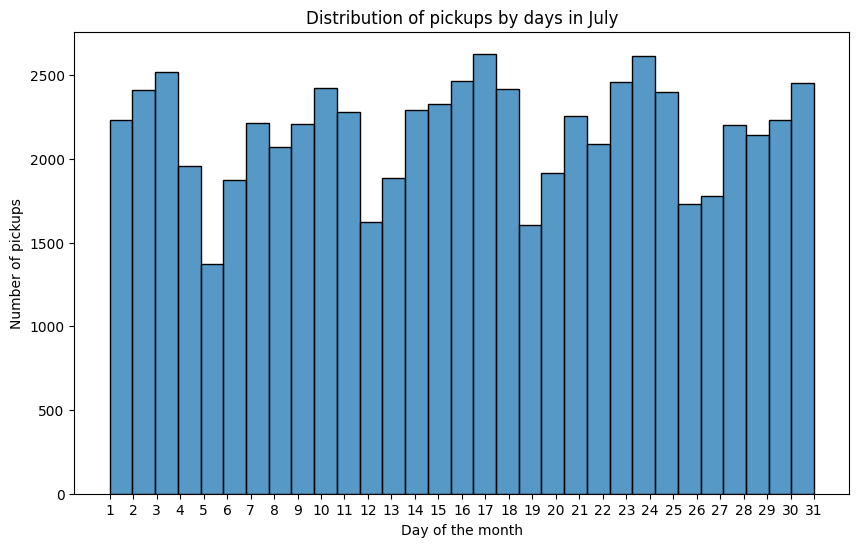

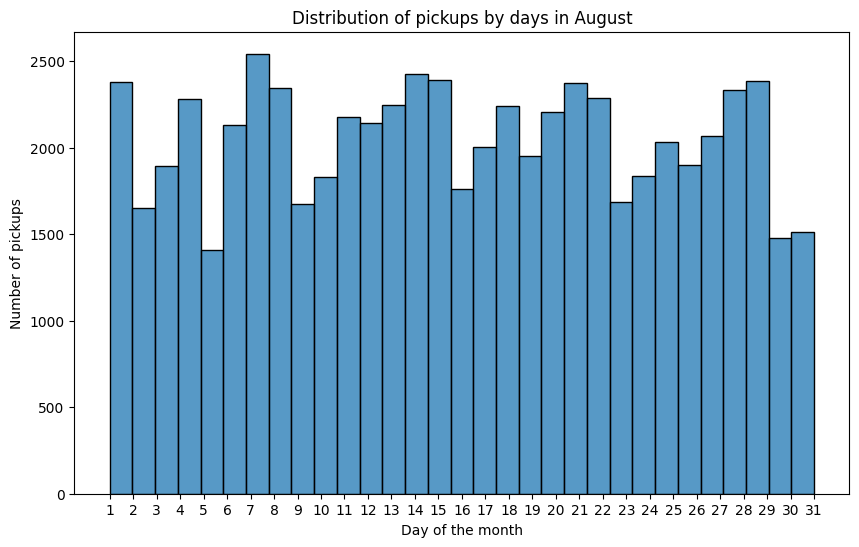

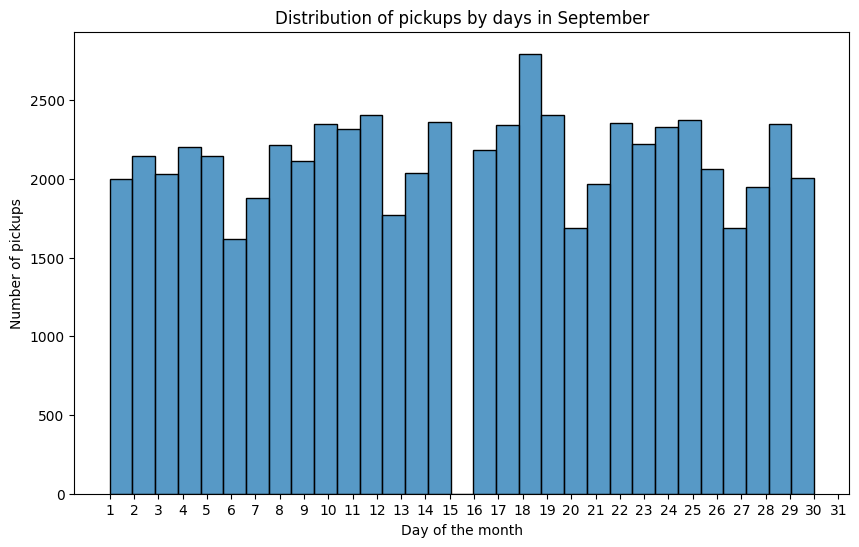

In [14]:
unique_months = data['Month'].unique()

for i, month in enumerate(unique_months):
    month_data = data[data['Month'] == month]
    
    plot_rides_by_day_for_specific_month(data, month)